In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/01_zincToks.csv")

In [3]:
df

,smiles,tokens,length
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,C C ( C ) ( C ) <0> c1ccc2occc2c1 <6> C C=O N ...,18
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,C <0S> C1CCCCC1 <2> <4S> ( C ) N <1> c1ccncc1 ...,16
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,C1CCNC1 <3> C=O C|R ( <0> c1ccccc1 ) O <3> c1c...,16
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,C C O C=O <1R> C1CCNCC1 <3> C=O <0> c1ncn2c1CC...,15
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C(O)[C@H](C#N)C...,O <4> C1=CC2(CC=N1)CCCCC2 <0> <1> ( C#N ) <3S>...,20
...,...,...,...
249323,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21,C <6> c1ccc2c(c1)CCCC2 <9S> <6> ( C ) C N C=O ...,14
249324,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,C C ( C ) ( C ) C=O <3> C1CCNCC1 <0> C=O N <3>...,22
249325,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1,C <0> c1ccccc1 <3> <4> ( C ) N C=O C=O N ( C )...,18
249326,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1,C <2> c1cc[nH]c1 <0> <4> ( C ) <3> ( <0> C1CC1...,22


In [4]:
_dict=df["length"].describe().to_dict()

In [5]:
iqr=_dict["75%"]-_dict["25%"]
_dict["lowerWisk"]= 3 #_dict["25%"]-1.5*iqr -> rounded to 3
_dict["upperWisk"]= 30 # _dict["75%"]+1.5*iqr -> rounded to 30

In [6]:
_dict

{'count': 249328.0,
 'mean': 16.712374863633446,
 'std': 4.855034526776576,
 'min': 3.0,
 '25%': 13.0,
 '50%': 16.0,
 '75%': 20.0,
 'max': 51.0,
 'lowerWisk': 3,
 'upperWisk': 30}

In [7]:
## Data for compactness employed by work of Group SELFIES
benchM=pd.read_csv("rawdata/compactnessBenchmarking.csv", index_col=0)

(0.0, 80.0)

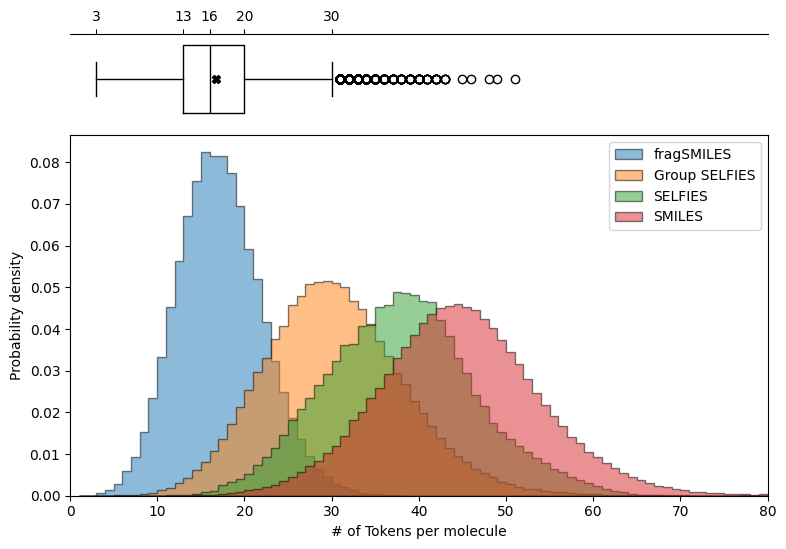

In [8]:
fig, ax = plt.subplots(
    2, figsize=(9, 6), sharex=False,
    gridspec_kw={"height_ratios": (.2, .8), "hspace":.05}
)

################################
# Boxplot #
color={'color': 'black'}
meanprops={'markerfacecolor': 'black', "marker":"X", 'markeredgecolor': 'black'}
boxP=ax[0].boxplot(df["length"], vert=False, showmeans=True, manage_ticks=True, medianprops=color, meanprops=meanprops)

# removing borders
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].xaxis.set_label_position('top')

values = np.array([boxP["whiskers"][i].get_xdata() for i in [0,1]], dtype=int).flatten()
values = sorted(values.tolist() + [int(df["length"].median())])
ax[0].set_xticks( values, labels=values )
ax[0].xaxis.tick_top()

ax[0].set_yticks([])
ax[0].set_ylim([0.9,1.1])
#################################

# Histogram
fixedKw=dict(fill=True, density=True, bins=np.array(range(1, 121)),
            histtype='stepfilled', alpha=0.5, ec="black")

ax[1].hist(df["length"], 
           # hatch="+", 
           # facecolor="grey",
           label="fragSMILES",
           **fixedKw
          )

for bench in ["Group SELFIES", "SELFIES", "SMILES"]:
    ax[1].hist(benchM.query("Type==@bench").iloc[...,1], 
               label=bench,
              **fixedKw
              )

ax[1].set_xlabel("# of Tokens per molecule")
ax[1].set_ylabel('Probability density')
ax[1].legend()
#################

ax[1].set_xlim([0, 80])
ax[1].set_xticks( np.array(range(0,81,10)) )
ax[1].xaxis.set_tick_params(labelbottom=True)
ax[0].set_xlim([0,80])

Supporting Information

In [9]:
from collections import Counter
import itertools

def getVocabularyFromTokens(tokens):
    counts = Counter(itertools.chain(*tokens))
    return {k:v for k,v in sorted(counts.items(), key=lambda x: x[1] , reverse=True ) }

In [10]:
df

,smiles,tokens,length
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,C C ( C ) ( C ) <0> c1ccc2occc2c1 <6> C C=O N ...,18
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,C <0S> C1CCCCC1 <2> <4S> ( C ) N <1> c1ccncc1 ...,16
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,C1CCNC1 <3> C=O C|R ( <0> c1ccccc1 ) O <3> c1c...,16
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,C C O C=O <1R> C1CCNCC1 <3> C=O <0> c1ncn2c1CC...,15
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C(O)[C@H](C#N)C...,O <4> C1=CC2(CC=N1)CCCCC2 <0> <1> ( C#N ) <3S>...,20
...,...,...,...
249323,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21,C <6> c1ccc2c(c1)CCCC2 <9S> <6> ( C ) C N C=O ...,14
249324,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,C C ( C ) ( C ) C=O <3> C1CCNCC1 <0> C=O N <3>...,22
249325,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1,C <0> c1ccccc1 <3> <4> ( C ) N C=O C=O N ( C )...,18
249326,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1,C <2> c1cc[nH]c1 <0> <4> ( C ) <3> ( <0> C1CC1...,22


In [10]:
benchExocyclic_size = getVocabularyFromTokens(df.tokens.str.split(' '))

In [11]:
# [ ] Fix hist for t-Smiles
benchTsmiles = pd.read_csv("data/01_zincTsmilesToks_noDummy.csv")
benchTsmiles_size = getVocabularyFromTokens(benchTsmiles.tokens.str.split(' '))

In [12]:
benchRotatable = pd.read_csv('data/01_zincRotatableToks.csv')
benchRotatable_size = getVocabularyFromTokens(benchRotatable.tokens.str.split(' '))

In [13]:
from matplotlib.patches import Patch

In [16]:
# colors = list(plt.get_cmap("tab10").colors)
colors = list(plt.get_cmap("Pastel2").colors)

labels=['t-SMILES - word-level tokenization', 'fragSMILES - Rotatable bonds', 'fragSMILES - Exocyclic single bonds']

legend = [ Patch(facecolor=color, label=label) for label,color in zip(labels, colors) ]

/tmp/ipykernel_4101115/3890499439.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplots = ax.boxplot([benchTsmiles.length, benchRotatable.length, df.length], vert=True, patch_artist=True,


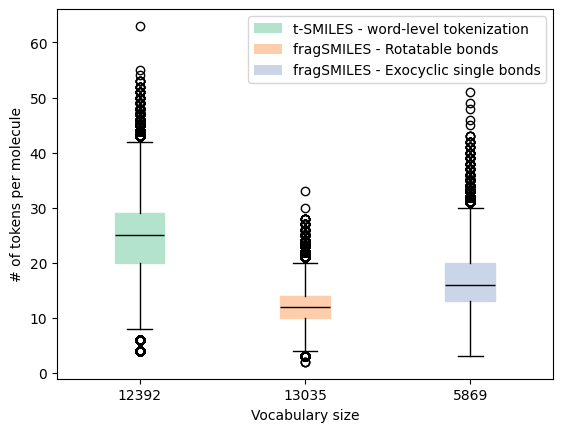

In [17]:
fig, ax = plt.subplots(1,1)
boxplots = ax.boxplot([benchTsmiles.length, benchRotatable.length, df.length], vert=True, patch_artist=True,
                    labels=[len(benchTsmiles_size), len(benchRotatable_size), len(benchExocyclic_size)])

ax.set_ylabel('# of tokens per molecule')
ax.set_xlabel('Vocabulary size')

for box, median, color in zip(boxplots['boxes'], boxplots['medians'], colors):
    box.set_color(color)
    median.set_color('black')

ax.legend(handles=legend)
fig.show()

In [18]:
fig.savefig("figures/02_encodingCount_SI.pdf", bbox_inches='tight', dpi = 200)
fig.savefig("figures/02_encodingCount_SI.png", bbox_inches='tight', dpi = 200)